DATASET EDA AND PREPROCESSING

This notebook corresponds to Jokin Cuesta's Master's Thesis for the Master's Degree in Data Science at the UOC. In this notebook, the EDA of the dataset used and the preprocessing will be carried out.

Some of the code is inspired in Rafael Corvillo´s thesis (https://github.com/rcorvial/vehicles_collision_detector). This code is referenced in each cell as (RC)

In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import pickle
import os
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [3]:
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
# Load dataset of positions
DATASETS_FOLDER = os.path.join("TFM", "datasets")
DATASET_FILE = os.path.join(DATASETS_FOLDER, "positions.csv")
df = pd.read_csv(DATASET_FILE)

In [6]:
# First 5 values of the dataset
df.head()

,time(s),vehicle_id,victim_id,shape_collider,shape_victim,latitude(m),longitude(m),speed(m/s),heading,acceleration(m/s²),collision
0,1.0,100,-1,delivery,-1,41.392245,2.162762,0.0,45.241513,0.0,0
1,1.0,101,-1,moped,-1,41.390385,2.164237,0.0,133.252622,0.0,0
2,1.0,102,-1,passenger,-1,41.393895,2.162749,0.0,137.914783,0.0,0
3,1.0,103,-1,passenger,-1,41.390752,2.162845,0.0,225.740562,0.0,0
4,1.0,104,-1,motorcycle,-1,41.390913,2.163528,0.0,132.292083,0.0,0


In [5]:
# identification of outliers
print(df.isnull().sum()) # shows the number of null values in each column

time(s)               0
vehicle_id            0
victim_id             0
shape_collider        0
shape_victim          0
latitude(m)           0
longitude(m)          0
speed(m/s)            0
heading               0
acceleration(m/s²)    0
collision             0
dtype: int64


In [ ]:
# Range of values (RC)
print("time(s): [{}, {}]".format(min(df['time(s)']), max(df['time(s)'])))
print("vehicle_id: [{}, {}]".format(min(df['vehicle_id']),
                                    max(df['vehicle_id'])))
print("victim_id: [{}, {}]".format(min(df['victim_id']), max(df['victim_id'])))
print("latitude(m): [{}, {}]".format(min(df['latitude(m)']),
                                     max(df['latitude(m)'])))
print("longitude(m): [{}, {}]".format(min(df['longitude(m)']),
                                      max(df['longitude(m)'])))
print("speed(m/s): [{}, {}]".format(min(df['speed(m/s)']),
                                    max(df['speed(m/s)'])))
print("heading: [{}, {}]".format(min(df['heading']), max(df['heading'])))
print("acceleration(m/s²): [{}, {}]".format(min(df['acceleration(m/s²)']),
      max(df['acceleration(m/s²)'])))


time(s): [1.0, 72000.0]
vehicle_id: [2, 10591]
victim_id: [-1, 10548]
latitude(m): [41.38698443730398, 41.39414143672337]
longitude(m): [2.157936523084977, 2.1675456322138467]
speed(m/s): [0.0, 18.71895238439466]
heading: [0.0002531690841852, 359.99305154630207]
acceleration(m/s²): [-10.0, 5.999999656410755]


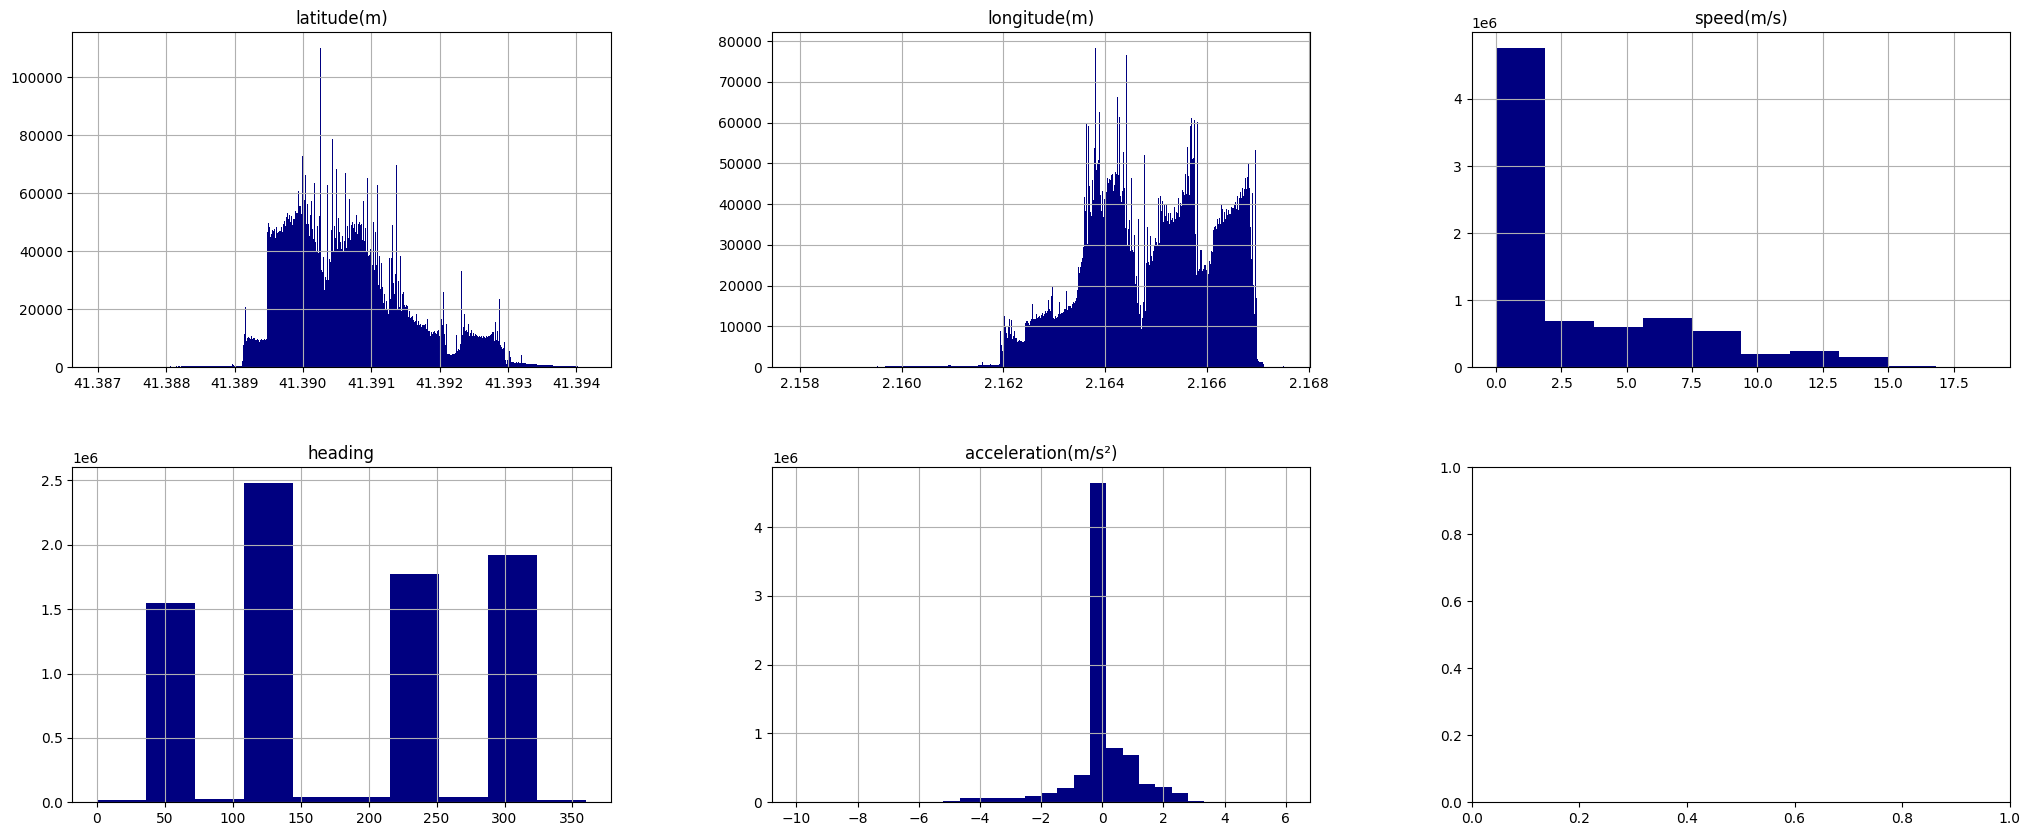

In [7]:
# Distributions of numerical attributes (RC)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

df.hist('latitude(m)', ax=ax[0][0],  color = 'navy', bins = 500)
df.hist('longitude(m)', ax=ax[0][1],  color = 'navy', bins = 500)
df.hist('speed(m/s)', ax=ax[0][2],  color = 'navy')
df.hist('heading', ax=ax[1][0],  color = 'navy')
df.hist('acceleration(m/s²)', ax=ax[1][1],  color = 'navy', bins = 30)
plt.show()

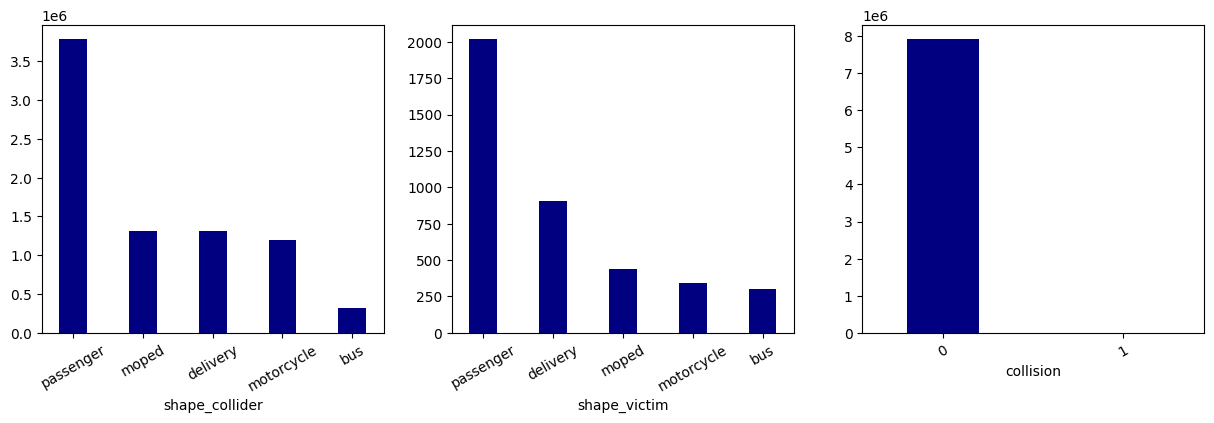

In [ ]:
# Distributions of categorical attributes
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
df['shape_collider'].value_counts().plot(kind='bar', rot=30,
                                         xlabel='shape_collider', color = 'navy',
                                         width=0.4, ax=ax[0])
df['shape_victim'].value_counts().loc[lambda x: x.index != "-1"].plot(kind='bar',rot=30, xlabel='shape_victim', color='navy', width=0.4, ax=ax[1])
df['collision'].value_counts().plot(kind='bar', rot=30, xlabel='collision',
                                    color = 'navy', width=0.4, ax=ax[2])
plt.show()

In [ ]:
# Categories counter (RC)
print("shape_collider\n--------------")
print(df['shape_collider'].value_counts())
print("\nshape_victim\n------------")
print(df['shape_victim'].value_counts())
print("\ncollision\n---------")
print(df['collision'].value_counts())

shape_collider
--------------
passenger     3781716
moped         1315803
delivery      1306875
motorcycle    1193602
bus            316250
Name: shape_collider, dtype: int64

shape_victim
------------
-1            7910244
passenger        2016
delivery          904
moped             439
motorcycle        345
bus               298
Name: shape_victim, dtype: int64

collision
---------
0    7910244
1       4002
Name: collision, dtype: int64


In [ ]:
import folium
# Obtain first 1000 values of lat and lon
df_subset = df.head(1000)
latitude_values = df_subset['latitude(m)']
longitude_values = df_subset['longitude(m)']

# Create a map centered in the first ubication
latitude_inicial = latitude_values.iloc[0]
longitude_inicial = longitude_values.iloc[0]
mapa = folium.Map(location=[latitude_inicial, longitude_inicial], zoom_start=12)

# Iterate over the first 1000 values of latitude and longitude.
for lat, lon in zip(latitude_values, longitude_values):
    # Adds a marker for each latitude and longitude point
    folium.Marker([lat, lon]).add_to(mapa)

# Show the map
mapa

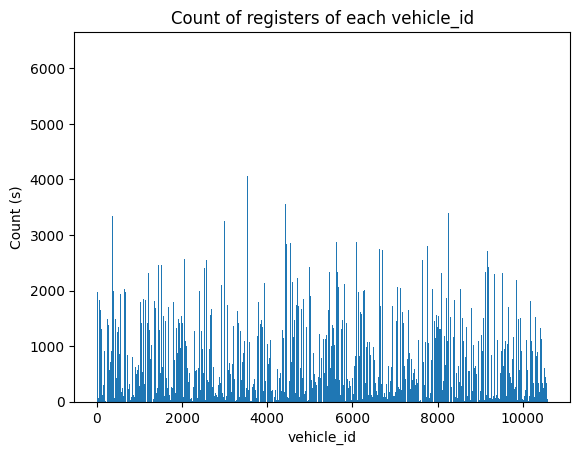

In [ ]:
# Create the count histogram
plt.hist(df["vehicle_id"].values, bins=len(df["vehicle_id"].unique()))

# Set histogram labels and histogram title
plt.xlabel("vehicle_id")
plt.ylabel("Count (s)")
plt.title("Count of registers of each vehicle_id")

# Show the count
plt.show()

In [ ]:
# Count time registered per vehicle
df_vehicle_time = (df[['time(s)', 'vehicle_id']].groupby(['vehicle_id']).count()
                   .rename(columns={'time(s)': 'seconds'}))
df_vehicle_time.head()

,seconds
vehicle_id,
2,1828
3,636
4,423
5,44
6,1889


In [ ]:
# Identificar las 'vehicle_id' que tienen velocidad igual a 0
zero_speed_ids = df.loc[df['speed(m/s)'] == 0, 'vehicle_id'].unique()

# Eliminar todos los registros correspondientes a las 'vehicle_id' con velocidad igual a 0
df = df[~df['vehicle_id'].isin(zero_speed_ids)]

In [ ]:
print("Vehicle IDs diferentes:", len(df['vehicle_id'].value_counts()))

Vehicle IDs diferentes: 0


In [ ]:
df_vehiculos = df[['vehicle_id', 'shape_collider']].drop_duplicates()
print("Number of each shape of collider: \n--------------------\n",df_vehiculos['shape_collider'].value_counts())

Number of each shape of collider: 
--------------------
 passenger     4701
delivery      2208
moped         1232
motorcycle    1229
bus            611
Name: shape_collider, dtype: int64


In [ ]:
df_vehiculos = df[['vehicle_id', 'shape_victim']].drop_duplicates()
print("Number of each shape of victim: \n--------------------\n",df_vehiculos['shape_victim'].value_counts())

Number of each shape of victim: 
--------------------
 -1            9981
passenger     2016
delivery       904
moped          439
motorcycle     345
bus            298
Name: shape_victim, dtype: int64


In [ ]:
import random
# Group by vehicle_id and victim_id
grouped = df[df['victim_id'] != -1].groupby(['vehicle_id', 'victim_id'])

# Select only the vehicle_id and victim_id columns
pairs = grouped[['vehicle_id', 'victim_id']].last()

# Create a list of unique pairs
unique_pairs_col = list(set([tuple(row) for row in pairs.values]))

# Filtering of minimum 200 seconds on the way
unique_pairs_col_time = [p for p in unique_pairs_col if ((df[df['vehicle_id']==p[0]].shape[0] >= 200) and df[df['vehicle_id']==p[1]].shape[0] >= 200 )]

# Select 1000 pairs at random
col_pairs = random.sample(unique_pairs_col_time, 1000)

In [ ]:
import random
# Groups the non-collision records by vehicle_id and retrieves the last record of each one
last_records = df[df['victim_id'] == -1].groupby('vehicle_id').last()

# Selecs records whose time matches
coincidences = last_records[last_records.duplicated(subset=['time(s)'], keep=False)]

# Get the list of matching vehicle_id pairs in time
pairs = []
for tiempo in coincidences['time(s)'].unique():
    ids = coincidences[coincidences['time(s)'] == tiempo].index.tolist()
    pairs.extend([(ids[i], ids[j]) for i in range(len(ids)) for j in range(i+1, len(ids))])

# Filtering of minimum 200 seconds on the way
nocol_pairs_time = [p for p in pairs if ((df[df['vehicle_id']==p[0]].shape[0] >= 200) and df[df['vehicle_id']==p[1]].shape[0] >= 200)]

nocol_pairs = random.sample(nocol_pairs_time, k=len(col_pairs))

In [ ]:
# Save colission dataset
df_col = pd.DataFrame(col_pairs, columns=['vehicle_id', 'victim_id'])
COLLISION_FILE = os.path.join(DATASETS_FOLDER, "collision.csv")
df_col.to_csv(COLLISION_FILE, index=False)

# Save no colission dataset
df_no_col = pd.DataFrame(nocol_pairs, columns=['v1', 'v2'])
NO_COLLISION_FILE = os.path.join(DATASETS_FOLDER, "no_collision.csv")
df_no_col.to_csv(NO_COLLISION_FILE, index=False)

SCALE THE VALUES

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
DATASETS_FOLDER = os.path.join("TFM", "datasets")
POSITIONS_FILE = os.path.join(DATASETS_FOLDER, "positions.csv")
df = pd.read_csv(POSITIONS_FILE)
columns = ['time(s)', 'vehicle_id', 'latitude(m)', 'longitude(m)', 'heading']
df = df[columns]
df.head()

,time(s),vehicle_id,latitude(m),longitude(m),heading
0,1.0,100,41.392245,2.162762,45.241513
1,1.0,101,41.390385,2.164237,133.252622
2,1.0,102,41.393895,2.162749,137.914783
3,1.0,103,41.390752,2.162845,225.740562
4,1.0,104,41.390913,2.163528,132.292083


In [ ]:
# Flatten the list of col_pairs and convert it to a set to get unique IDs
col_ids = set([id for pair in col_pairs for id in pair])
# Convert the set back to a list if needed
col_ids_list = list(col_ids)

# Flatten the list of nocol_pairs and convert it to a set to get unique IDs
nocol_ids = set([id for pair in nocol_pairs for id in pair])
# Convert the set back to a list if needed
nocol_ids_list = list(nocol_ids)

In [ ]:
DATA_PREPARATION_FOLDER = os.path.join("TFM", "implementation",
                                       "data_preparation")
os.makedirs(DATA_PREPARATION_FOLDER, exist_ok=True)

In [ ]:
# MinMax scaler for features (RC)
minmaxscaler = MinMaxScaler()
scaled_features = minmaxscaler.fit_transform(df.iloc[:, 2:])  # Apply scaling to all columns except 'time(s)' and 'vehicle_id'

# Save scaler for future use
minmaxscaler_file = os.path.join(DATA_PREPARATION_FOLDER, "minmaxscaler.pkl")
with open(minmaxscaler_file, "wb") as f_scaler:
    pickle.dump(minmaxscaler, f_scaler)

# Generate scaled dataset
scaled_features = pd.DataFrame(scaled_features, columns=df.columns[2:])  # Use column names from the original dataset
df_scaled = pd.concat([df.iloc[:, :2], scaled_features], axis=1)

In [ ]:
df_scaled

,time(s),vehicle_id,latitude(m),longitude(m),heading
0,1.0,100,0.734970,0.502159,0.125673
1,1.0,101,0.475082,0.655704,0.370153
2,1.0,102,0.965586,0.500783,0.383104
3,1.0,103,0.526437,0.510766,0.627069
4,1.0,104,0.548890,0.581931,0.367485
...,...,...,...,...,...
7914241,72000.0,10584,0.433638,0.668981,0.131806
7914242,72000.0,10585,0.618888,0.824427,0.882379
7914243,72000.0,10587,0.675081,0.761731,0.386877
7914244,72000.0,10590,0.746547,0.756829,0.626105


In [ ]:
# Save scaled dataset
SCALED_FILE = os.path.join(DATASETS_FOLDER, "scaled_dataset.csv")
df_scaled.to_csv(SCALED_FILE, index=False)